# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

<div class="span5 alert alert-info">
### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution
</div>
****

In [2]:
import pandas as pd
import numpy as np
from scipy import stats

In [3]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [4]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


In [5]:
# number of callbacks for black-sounding names
sum(data[data.race=='w'].call)

235.0

In [6]:
#seperate out the samples
w = data[data.race=='w']
b = data[data.race=='b']

#find n - We'll only use one n because it's the same for both samples
n = len(w)

#find the number from each sample that recieved a call
wcall = w.call.sum()
bcall = b.call.sum()

#Find the proportion of successes and faliures for each sample
wpr = wcall/len(w)
bpr = bcall/len(b)


#multiply proportions by n
nwpr = wpr*n
nbpr = bpr*n

#multiply 1-proportions by n
nwpr1 = (1-wpr)*n
nbpr1 = (1-wpr)*n


print('\t\tWhite', '\tBlack')
print ('n:\t\t',len(w),'\t', len(b))
print ('calls:\t\t', wcall,'\t', bcall)
print ('p-hat:\t\t',round(wpr,3),'\t', round(bpr,2))
print ('p-hat*n:\t',int(nwpr),'\t', int(nbpr))
print ('(1 - p-hat)*n:\t',int(nwpr1),'\t', int(nbpr1))

		White 	Black
n:		 2435 	 2435
calls:		 235.0 	 157.0
p-hat:		 0.097 	 0.06
p-hat*n:	 235 	 157
(1 - p-hat)*n:	 2200 	 2200


<div class="span5 alert alert-success">
<p>Your answers to Q1 and Q2 here</p>
</div>
1. What test is appropriate for this problem? Does CLT apply?

As the test is about proportions, so the most appropriate test is a two sample z test. The central limit theorem applies because there is a large sample size (well over 30), and the proportions of success and failures multiplied by n are both over 10. 

2. What are the null and alternate hypotheses?

The null hypothesis is that the observed difference between the samples is due to random variation, while the alternate is that there is a significantly larger number of white sounding names that received calls. 

$$H_0: \hat{p}_{white calls} = \hat{p}_{black calls}$$
$$H_a: \hat{p}_{white calls} > \hat{p}_{black calls}$$

As the null hypothesis implies that there is little evidence for discrimination in hiring practices, the danger of type 2 error (failure to reject the null hypothesis) would be a highly controversial result stepping into "The Bell Curve" territory. While a much lower p-value is expected, let's keep it at $\alpha = .05$. There should be a very high statistical power before asserting discrimination in hiring is not statistically significant


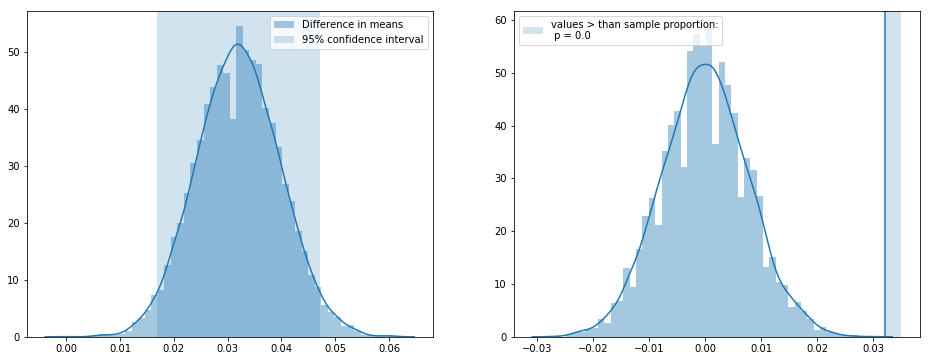

Sample difference in proportions:		 0.032
Bootstrapped mean difference in proportions:	 0.032
Bootstrapped margin of error:			 0.0152
Bootstrapped 95% confidence interval:		 0.0168, 0.0472
Bootstrapped p-value:				 0.0


In [72]:
# Your solution to Q3 here
# Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
import matplotlib.pyplot as plt
import seaborn as sns

#bootstrap sample function
def bs_sample(data, func, s_size, size=10000):
    #initialize array
    bs_s = np.empty(size)
    #start for loop for sample size 
    for i in range(size):
        #draw random sample (with replacement) sample size out of the dataset
        bs = np.random.choice(data, s_size)
        #run desired function on dataset
        out = func(bs)
        #save function to array
        bs_s[i] = out
    #return array
    return bs_s
        
#Function to calculate proportion of callbacks
def phat(data):
    
    #find n
    n = len(data)
    #find callbacks
    calls = data.sum()
    #find p-hat
    phat = calls/n
    return phat

#seed np.random for consistent results
np.random.seed(42)

#call functions to calculate bs of proportions
bs_pr_w = bs_sample(w.call, phat, len(w))
bs_pr_b = bs_sample(b.call, phat, len(b))

#find difference in proportions
bs_diffpr = bs_pr_w - bs_pr_b
#find mean difference
bs_diff_mu = np.mean(bs_diffpr)

#find observed difference
sdp = wpr-bpr

#find confidence interval of difference in proportions
diffconint = np.percentile(bs_diffpr, [2.5, 97.5])

#find margin of error (bootstrapped)
bs_ME = diffconint[1] - bs_diff_mu


#plot curve
f, ax = plt.subplots(1, 2)
sns.distplot(bs_diffpr, label = 'Difference in means', ax=ax[0])
ax[0].axvspan(diffconint[0], diffconint[1], alpha=.2, label = '95% confidence interval')
ax[0].legend()

#plt.show()

#bootstrap p-value - reandomize the samples and compare to observed difference in proportions. 

#simulate null h
#Draw two bootstrap samples out of the data set with the length of the respective samples, and find the difference in proportions(n)
fakew = bs_sample(data.call, phat, n)
fakeb = bs_sample(data.call, phat, n)
nulldiff = fakew - fakeb

#find proportion of the null  >= than sample difference in proportions
bs_p = np.sum(nulldiff >= sdp)/len(nulldiff)
#print(bs_p)

#plot null distribution and p value
sns.distplot(nulldiff, ax=ax[1])
ax[1].axvline(odp)
ax[1].axvspan(odp, .035, alpha=.2, label='values > than sample proportion:\n p = '+str(bs_p))
ax[1].legend()

#style label and show plots
f.set_size_inches(16,6)
plt.show()

#print values
print('Sample difference in proportions:\t\t',round(sdp,4))
print('Bootstrapped mean difference in proportions:\t', round(bs_diff_mu,4))
print('Bootstrapped margin of error:\t\t\t', round(bs_ME,4))
print('Bootstrapped 95% confidence interval:\t\t',str(round(diffconint[0],4))+',',round(diffconint[1],4))
print('Bootstrapped p-value:\t\t\t\t', bs_p)

<div class="span5 alert alert-success">
<p> Your answers to Q4 and Q5 here </p>
</div>